<a href="https://colab.research.google.com/github/GabyLeon10100/MujeresDigitales/blob/main/Taller4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigando los accidentes de tránsito en Nueva York

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

## Introducción

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las vías de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como comuna, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema empresarial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan a las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV que contiene detalles sobre cada accidente como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es; en lugar del predeterminado,. Realizará las siguientes tareas con los datos:

*    Leer, transformar y preparar datos para su visualización
*    Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1.    ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2.   Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3.    ¿Hay más accidentes entre semana que los fines de semana?
4.    ¿Cuál es la proporción de accidentes por área por comuna? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5.    Para cada comuna, ¿durante qué horas es más probable que ocurran accidentes?
6.    ¿Cuáles son las 5 principales causas de accidentes en la ciudad?

In [131]:
# Use la siguiente informacipón de cada comuna ("borough") para realizar los análisis

borough_data = {'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}}

Tenemos las siguientes columnas

     Borough: el comuna en el que ocurrió el accidente.
     COLLISION_ID: un identificador único para esta colisión
     CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5): Motivos del accidente
     CROSS STREET : Calle transversal más cercana al lugar de los accidentes
     DATE: Fecha del accidente
     TIME: Hora del accidente
     DATETIME: la columna que creamos anteriormente con la combinación de fecha y hora
     LATITUDE: Latitud del accidente
     LONGITUDE: Longitud del accidente
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) INJURED: Lesión por categoría
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) KILLED: Categoría muerte sabia
     ON STREET NAME: Calle donde ocurrió el accidente
     TOTAL INJURED: Total de heridos por el accidente
     TOTAL KILLED: Total de bajas en el accidente
     VEHICLE TYPE CODE (1, 2, 3, 4, 5): Tipos de vehículos involucrados en el accidente
     ZIP CODE: código postal del lugar del accidente

Primero cargue los datos del csv a un dataframe.

**Nota:** El archivo se encuentra separado por punto y coma ( ; ) en lugar de coma ( , ), así que se debe ingresar el parámetro sep para leer el archivo. Aquí puede encontrar información:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

In [132]:
#Traemos el archivo "accidents_sample.csv"
from google.colab import files
uploaded = files.upload()

Saving accidents_sample.csv to accidents_sample (1).csv


In [133]:
# Escriba su código aquí
df = pd.read_csv('accidents_sample.csv', sep= ';')

## Parte 1: Accidentes a lo largo del tiempo

Agrupe los datos disponibles mensualmente y genere una gráfica lineal de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

In [134]:
#Mostramos los datos que estan guardados en la variable df
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,05/29/2019,8:19,QUEENS,11368.0,40.751060,-73.86954,NaN,0,0,0,0,0,0,Other Vehicular,Unspecified,NaN,NaN,NaN,4141862,Sedan,NaN,NaN,NaN,NaN
1,05/11/2018,16:30,QUEENS,11357.0,40.788480,-73.81369,NaN,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3899223,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2,07/18/2019,12:51,MANHATTAN,10022.0,40.755985,-73.96771,NaN,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4172694,Box Truck,NaN,NaN,NaN,NaN
3,07/06/2019,15:00,BROOKLYN,11218.0,40.646600,-73.97033,CHURCH AVENUE,0,0,0,0,0,0,Oversized Vehicle,Unspecified,NaN,NaN,NaN,4167007,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,07/14/2018,23:26,QUEENS,11369.0,40.760674,-73.86216,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3942936,Sedan,NaN,NaN,NaN,NaN


In [135]:
# Separamos las fechas por los meses
df['MONTH'] = (pd.to_datetime(df['DATE'], errors="coerce").dt.month)
df['YEAR'] = (pd.to_datetime(df['DATE'], errors="coerce").dt.year)
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,YEAR
0,05/29/2019,8:19,QUEENS,11368.0,40.751060,-73.86954,NaN,0,0,0,0,0,0,Other Vehicular,Unspecified,NaN,NaN,NaN,4141862,Sedan,NaN,NaN,NaN,NaN,5,2019
1,05/11/2018,16:30,QUEENS,11357.0,40.788480,-73.81369,NaN,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3899223,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,5,2018
2,07/18/2019,12:51,MANHATTAN,10022.0,40.755985,-73.96771,NaN,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4172694,Box Truck,NaN,NaN,NaN,NaN,7,2019
3,07/06/2019,15:00,BROOKLYN,11218.0,40.646600,-73.97033,CHURCH AVENUE,0,0,0,0,0,0,Oversized Vehicle,Unspecified,NaN,NaN,NaN,4167007,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,7,2019
4,07/14/2018,23:26,QUEENS,11369.0,40.760674,-73.86216,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3942936,Sedan,NaN,NaN,NaN,NaN,7,2018


In [136]:
#Agrupamos los meses para identificar los accidentes en cada uno 
df2 = df.groupby(["YEAR", "MONTH"]).MONTH.count()
df2

YEAR  MONTH
2018  1        2406
      2        2110
      3        2469
      4        2317
      5        2658
      6        2669
      7        2453
      8        2556
      9        2494
      10       2654
      11       2470
      12       2461
2019  1        2170
      2        2102
      3        2258
      4        2196
      5        2562
      6        2583
      7        2422
      8        1694
Name: MONTH, dtype: int64

In [137]:
#Con el filtro que realizamos, creamos una lista para poder acceder a la informacion
lista = [list(key) + [str(value)] for key,  value in  df2.to_dict().items()]

In [138]:
#Creamos el nuevo dataframe
df_grafica2018 = pd.DataFrame()
df_grafica2019 = pd.DataFrame()
#Realizamos un bucle con la lista que obtuvimos para agregar los datos al nuevo dataframe
for x in lista:
  if x[0] == 2018:
    agregar = {}
    agregar = {"Año" : int(x[0]), "Mes": x[1], "Accidente": int(x[2])}
    df_grafica2018 = df_grafica2018.append(agregar, ignore_index=True)
  else:
    agregar = {}
    agregar = {"Año" : int(x[0]), "Mes": x[1], "Accidente": int(x[2])}
    df_grafica2019 = df_grafica2019.append(agregar, ignore_index=True)
  #Lo visualizamos
df_grafica2019.head(20)

,Accidente,Año,Mes
0,2170.0,2019.0,1.0
1,2102.0,2019.0,2.0
2,2258.0,2019.0,3.0
3,2196.0,2019.0,4.0
4,2562.0,2019.0,5.0
5,2583.0,2019.0,6.0
6,2422.0,2019.0,7.0
7,1694.0,2019.0,8.0


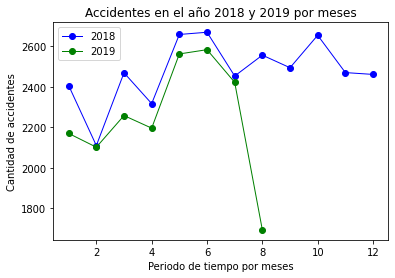

In [150]:
#Creamos la grafica
y = df_grafica2018['Accidente']
y2 = df_grafica2019['Accidente']
x = df_grafica2018['Mes']
x2 = df_grafica2019['Mes']
plt.plot(x,y,label='2018', linewidth = 1, color='blue', marker = "o")
plt.plot(x2,y2, label='2019',linewidth= 1, color='green', marker = "o")
plt.title("Accidentes en el año 2018 y 2019 por meses")
plt.ylabel("Cantidad de accidentes")
plt.xlabel("Periodo de tiempo por meses")
plt.legend()

## Parte 2: Puntos calientes de accidentes en un día

¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna HORA basada en los datos de la columna DATETIME, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

In [140]:
# Creamos el campo DAY con ayuda del campo DATE
df['DAY'] = (pd.to_datetime(df['DATE'], errors="coerce").dt.day)
df['HOUR'] = (pd.to_datetime(df['TIME'], errors="coerce").dt.hour)
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,YEAR,DAY,HOUR
0,05/29/2019,8:19,QUEENS,11368.0,40.751060,-73.869540,NaN,0,0,0,0,0,0,Other Vehicular,Unspecified,NaN,NaN,NaN,4141862,Sedan,NaN,NaN,NaN,NaN,5,2019,29,8
1,05/11/2018,16:30,QUEENS,11357.0,40.788480,-73.813690,NaN,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3899223,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,5,2018,11,16
2,07/18/2019,12:51,MANHATTAN,10022.0,40.755985,-73.967710,NaN,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4172694,Box Truck,NaN,NaN,NaN,NaN,7,2019,18,12
3,07/06/2019,15:00,BROOKLYN,11218.0,40.646600,-73.970330,CHURCH AVENUE,0,0,0,0,0,0,Oversized Vehicle,Unspecified,NaN,NaN,NaN,4167007,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,7,2019,6,15
4,07/14/2018,23:26,QUEENS,11369.0,40.760674,-73.862160,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3942936,Sedan,NaN,NaN,NaN,NaN,7,2018,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47699,06/02/2018,0:15,QUEENS,11434.0,40.663410,-73.769104,NaN,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3912529,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,6,2018,2,0
47700,06/04/2019,6:30,QUEENS,11370.0,40.766350,-73.887560,82 STREET,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4144762,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,6,2019,4,6
47701,05/03/2019,15:46,BRONX,10454.0,40.807556,-73.919235,EAST 138 STREET,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4126341,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,5,2019,3,15
47702,01/24/2018,19:05,MANHATTAN,10034.0,40.868332,-73.919020,NaN,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3834837,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1,2018,24,19


In [146]:
# Agrupamos por el año, mes, dia y tiempo, para asegurarse que solo esta leyendo los datos de un dia y realizamos el conteo de veces que se repite
# Que seria el número de accidentes a esa hora del dia 
df3 = df.groupby(["YEAR", "MONTH", "DAY", "HOUR"]).MONTH.count()
df3.head()

YEAR  MONTH  DAY  HOUR
2018  1      1    0       1
                  1       5
                  2       7
                  3       3
                  4       3
Name: MONTH, dtype: int64

In [142]:
#Vamos a crear una lista sobre los datos obtenidos
lista1 = [list(key) + [str(value)] for key,  value in  df3.to_dict().items()]

In [147]:
#Creamos el nuevo dataframe
df_day1 = pd.DataFrame()
#Agregamos los datos de solo el dia 1 del mes 1 y del año 2018 al nuevo dataFrame creado
for x in lista1:
  if x[0] == 2018 and x[1] == 1 and x[2] == 1:
    agregar = {}
    agregar = {"Año" : int(x[0]), "Mes": x[1], "Dia": x[2], "Hora": x[3], "Accidente": int(x[4])}
    df_day1 = df_day1.append(agregar, ignore_index=True)
df_day1.head()

,Accidente,Año,Dia,Hora,Mes
0,1.0,2018.0,1.0,0.0,1.0
1,5.0,2018.0,1.0,1.0,1.0
2,7.0,2018.0,1.0,2.0,1.0
3,3.0,2018.0,1.0,3.0,1.0
4,3.0,2018.0,1.0,4.0,1.0


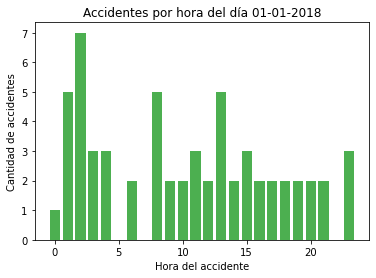

In [148]:
#Creamos la grafica de barras
valores = df_day1[["Hora", "Accidente"]]
x = valores.Hora
y = valores.Accidente
plt.bar(x, y, color = "#4CAF50")
plt.title("Accidentes por hora del día 01-01-2018")
plt.xlabel("Hora del accidente")
plt.ylabel("Cantidad de accidentes")
plt.show()

## Parte 3: Accidentes por día laborable

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

In [172]:
#Obtenemos el dia de la semana (0 = Lunes... 6 = Domingo) y la almacenamos en el campo WEEK
df['WEEK'] = (pd.to_datetime(df['DATE'], errors="coerce").dt.weekday)
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,YEAR,DAY,HOUR,WEEK
0,05/29/2019,8:19,QUEENS,11368.0,40.751060,-73.86954,NaN,0,0,0,0,0,0,Other Vehicular,Unspecified,NaN,NaN,NaN,4141862,Sedan,NaN,NaN,NaN,NaN,5,2019,29,8,2
1,05/11/2018,16:30,QUEENS,11357.0,40.788480,-73.81369,NaN,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3899223,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,5,2018,11,16,4
2,07/18/2019,12:51,MANHATTAN,10022.0,40.755985,-73.96771,NaN,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4172694,Box Truck,NaN,NaN,NaN,NaN,7,2019,18,12,3
3,07/06/2019,15:00,BROOKLYN,11218.0,40.646600,-73.97033,CHURCH AVENUE,0,0,0,0,0,0,Oversized Vehicle,Unspecified,NaN,NaN,NaN,4167007,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,7,2019,6,15,5
4,07/14/2018,23:26,QUEENS,11369.0,40.760674,-73.86216,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3942936,Sedan,NaN,NaN,NaN,NaN,7,2018,14,23,5


In [206]:
#Escogemos una semana de la que encontramos en el archivo
#En este caso sera la semana: 09/17/2018 a 09/23/2018
#Creamos una mascara para que solo nos traiga los datos de esa semana 
mask = (df['DATE'] >= '09/17/2018') & (df['DATE'] <= '09/23/2018')
mask

0        False
1        False
2        False
3        False
4        False
         ...  
47699    False
47700    False
47701    False
47702    False
47703     True
Name: DATE, Length: 47704, dtype: bool

In [207]:
#Creamos un nuevo DataFrame con los valores de la mascara
df_semana = df[mask]
df_semana

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,YEAR,DAY,HOUR,WEEK
175,09/18/2018,19:00,MANHATTAN,10022.0,40.760925,-73.967050,3 AVENUE,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,3983457,Station Wagon/Sport Utility Vehicle,Motorcycle,NaN,NaN,NaN,9,2018,18,19,1
261,09/22/2018,22:27,BRONX,10470.0,40.898273,-73.867325,EAST 236 STREET,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3988529,NaN,NaN,NaN,NaN,NaN,9,2018,22,22,5
320,09/19/2018,18:23,BRONX,10472.0,40.826767,-73.861380,NaN,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3984789,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,9,2018,19,18,2
336,09/17/2018,14:33,STATEN ISLAND,10310.0,40.627820,-74.121260,FOREST AVENUE,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3984462,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,9,2018,17,14,0
360,09/17/2018,8:00,BROOKLYN,11230.0,40.619106,-73.958310,EAST 17 STREET,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3982525,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,9,2018,17,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47348,09/23/2018,17:00,MANHATTAN,10012.0,40.727287,-74.000640,THOMPSON STREET,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3986211,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,9,2018,23,17,6
47403,09/18/2018,14:00,QUEENS,11361.0,40.764816,-73.786800,35 AVENUE,0,0,0,0,0,0,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,3983394,FDNY,Sedan,NaN,NaN,NaN,9,2018,18,14,1
47509,09/17/2018,15:00,BROOKLYN,11230.0,40.615314,-73.962370,AVENUE N,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3982908,Van,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,9,2018,17,15,0
47658,09/20/2018,9:45,QUEENS,11001.0,40.727226,-73.710510,JAMAICA AVENUE,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,NaN,NaN,3984742,Sedan,Sedan,Sedan,NaN,NaN,9,2018,20,9,3


In [208]:
#Agrupamos los datos por el dia de la semana
df4 = df_semana.groupby(["WEEK", "DATE"]).WEEK.count()
df4.head(100)

WEEK  DATE      
0     09/17/2018    93
1     09/18/2018    93
2     09/19/2018    74
3     09/20/2018    87
4     09/21/2018    84
5     09/22/2018    67
6     09/23/2018    58
Name: WEEK, dtype: int64

In [209]:
#Pasamos los datos a una lista
lista2 = [list(key) + [str(value)] for key, value in  df4.to_dict().items()]

In [212]:
#Creamos el nuevo dataframe
df_week = pd.DataFrame()
#Agregamos los datos de solo el dia 1 del mes 1 y del año 2018 al nuevo dataFrame creado
for x in lista2:
  agregar = {}
  agregar = {"Semana" : int(x[0]), "Accidente": int(x[2])}
  df_week = df_week.append(agregar, ignore_index=True)
df_week.head(7)

,Accidente,Semana
0,93.0,0.0
1,93.0,1.0
2,74.0,2.0
3,87.0,3.0
4,84.0,4.0
5,67.0,5.0
6,58.0,6.0


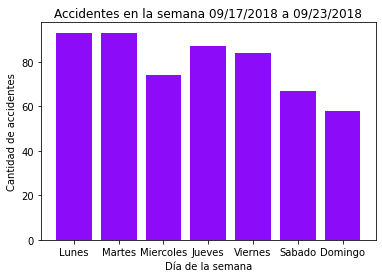

In [217]:
#Realizamos el grafico con los datos obtenidos
valores = df_week[["Semana", "Accidente"]]
x = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
y = valores.Accidente
plt.bar(x, y, color = "#8c0bf8")
plt.title("Accidentes en la semana 09/17/2018 a 09/23/2018")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de accidentes")
plt.show()

## Parte 4: Análisis de comuna

Trace un gráfico de barras del número total de accidentes en cada comuna, así como uno de los accidentes por kilómetro cuadrado por comuna. ¿Qué puedes concluir?

In [257]:
# Primer paso: Total de accidentes en cada comuna
# Creamos el filtro para tener un numero unico para cada comuna
mask = (df['BOROUGH'] == 'BRONX')
mask1 = (df['BOROUGH'] == 'BROOKLYN')
mask2 = (df['BOROUGH'] == 'MANHATTAN')
mask3 = (df['BOROUGH'] == 'QUEENS')
mask4 = (df['BOROUGH'] == 'STATEN ISLAND')
mask

0        False
1        False
2        False
3        False
4        False
         ...  
47699    False
47700    False
47701     True
47702    False
47703    False
Name: BOROUGH, Length: 47704, dtype: bool

In [264]:
# Colocamos el valor en el df principal
df_uno = df[mask]
df_uno = df_uno.index
df_uno
df.loc[df_uno, 'NCOMUNA'] = 1

df_dos = df[mask1]
df_dos = df_dos.index
df_dos
df.loc[df_dos, 'NCOMUNA'] = 2

df_tres = df[mask2]
df_tres = df_tres.index
df_tres
df.loc[df_tres, 'NCOMUNA'] = 3

df_cuatro = df[mask3]
df_cuatro = df_cuatro.index
df_cuatro
df.loc[df_cuatro, 'NCOMUNA'] = 4

df_quinto = df[mask4]
df_quinto = df_quinto.index
df_quinto
df.loc[df_quinto, 'NCOMUNA'] = 5
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,YEAR,DAY,HOUR,WEEK,NCOMUNA
0,05/29/2019,8:19,QUEENS,11368.0,40.751060,-73.869540,NaN,0,0,0,0,0,0,Other Vehicular,Unspecified,NaN,NaN,NaN,4141862,Sedan,NaN,NaN,NaN,NaN,5,2019,29,8,2,4.0
1,05/11/2018,16:30,QUEENS,11357.0,40.788480,-73.813690,NaN,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3899223,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,5,2018,11,16,4,4.0
2,07/18/2019,12:51,MANHATTAN,10022.0,40.755985,-73.967710,NaN,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4172694,Box Truck,NaN,NaN,NaN,NaN,7,2019,18,12,3,3.0
3,07/06/2019,15:00,BROOKLYN,11218.0,40.646600,-73.970330,CHURCH AVENUE,0,0,0,0,0,0,Oversized Vehicle,Unspecified,NaN,NaN,NaN,4167007,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,7,2019,6,15,5,2.0
4,07/14/2018,23:26,QUEENS,11369.0,40.760674,-73.862160,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3942936,Sedan,NaN,NaN,NaN,NaN,7,2018,14,23,5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47699,06/02/2018,0:15,QUEENS,11434.0,40.663410,-73.769104,NaN,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3912529,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,6,2018,2,0,5,4.0
47700,06/04/2019,6:30,QUEENS,11370.0,40.766350,-73.887560,82 STREET,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4144762,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,6,2019,4,6,1,4.0
47701,05/03/2019,15:46,BRONX,10454.0,40.807556,-73.919235,EAST 138 STREET,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4126341,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,5,2019,3,15,4,1.0
47702,01/24/2018,19:05,MANHATTAN,10034.0,40.868332,-73.919020,NaN,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3834837,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1,2018,24,19,2,3.0


In [269]:
# Agrupamos los datos por el numero de comuna y la cantidad de accidentes
df5 = df.groupby(["NCOMUNA", "BOROUGH"]).MONTH.count()
df5.head()

NCOMUNA  BOROUGH      
1.0      BRONX             7547
2.0      BROOKLYN         15248
3.0      MANHATTAN         9918
4.0      QUEENS           13173
5.0      STATEN ISLAND     1818
Name: MONTH, dtype: int64

In [270]:
#Pasamos los datos a una lista
lista3 = [list(key) + [str(value)] for key, value in  df5.to_dict().items()]

In [272]:
#Creamos el nuevo dataframe
df_comuna = pd.DataFrame()
#Agregamos los datos de solo el dia 1 del mes 1 y del año 2018 al nuevo dataFrame creado
for x in lista3:
  agregar = {}
  agregar = {"Comuna" : x[0], "Accidente": int(x[2])}
  df_comuna = df_comuna.append(agregar, ignore_index=True)
df_comuna.head(7)

,Accidente,Comuna
0,7547.0,1.0
1,15248.0,2.0
2,9918.0,3.0
3,13173.0,4.0
4,1818.0,5.0


In [281]:
# Ahora que hemos obtenido esa información necesitamos saber el número de accidentes por km cuadrado de cada comuna
area_bronx = borough_data['the bronx']['area']
area_brooklyn = borough_data['brooklyn']['area']
area_manhattan = borough_data['manhattan']['area']
area_queens = borough_data['queens']['area']
area_staten = borough_data['staten island']['area']

In [300]:
y2 = []
y2.append(df_comuna['Accidente'][0] / area_bronx)
y2.append(df_comuna['Accidente'][1] / area_brooklyn)
y2.append(df_comuna['Accidente'][2] / area_manhattan)
y2.append(df_comuna['Accidente'][3] / area_queens)
y2.append(df_comuna['Accidente'][4] / area_staten)
y2

[179.26365795724465,
 215.30641061846939,
 434.4283837056505,
 121.3765779047268,
 31.146136714065445]

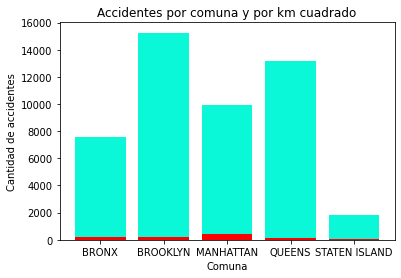

In [405]:
#Realizamos el grafico con los datos obtenidos
valores = df_comuna[["Comuna", "Accidente"]]
x = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS','STATEN ISLAND']
y = valores.Accidente
plt.bar(x, y, label="Accidentes comuna",color = "#0bf8d8")
plt.bar(x, y2, label="Accidentes comuna por km", color="Red")
plt.title("Accidentes por comuna y por km cuadrado")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de accidentes")
plt.show()

## Parte 5: Análisis por hora del comuna

¿Qué horas tienen más accidentes en cada comuna? Trace un gráfico de barras para cada comuna que muestre el número de accidentes por cada hora del día.

In [319]:
# Realizamos un filtro por comuna y por hora y contamos la cantidad de accidentes
df6 = df.groupby(["NCOMUNA", "HOUR"]).MONTH.count()
df6.head()

NCOMUNA  HOUR
1.0      0       262
         1       113
         2        95
         3        69
         4        77
Name: MONTH, dtype: int64

In [320]:
#Pasamos los datos a una lista
lista4 = [list(key) + [str(value)] for key, value in  df6.to_dict().items()]

In [351]:
#Creamos los nuevos dataframes
df_comuna1 = pd.DataFrame()
df_comuna2 = pd.DataFrame()
df_comuna3 = pd.DataFrame()
df_comuna4 = pd.DataFrame()
df_comuna5 = pd.DataFrame()
#Agregamos los datos de solo el dia 1 del mes 1 y del año 2018 al nuevo dataFrame creado
for x in lista4:
  agregar = {}
  if x[0] == 1.0:
    agregar = {"Comuna" : x[0], "Hora": x[1], "Accidente": int(x[2])}
    df_comuna1 = df_comuna1.append(agregar, ignore_index=True)
  elif x[0] == 2.0:
    agregar = {"Comuna" : x[0], "Hora": x[1], "Accidente": int(x[2])}
    df_comuna2 = df_comuna2.append(agregar, ignore_index=True)
  elif x[0] == 3.0:
    agregar = {"Comuna" : x[0], "Hora": x[1], "Accidente": int(x[2])}
    df_comuna3 = df_comuna3.append(agregar, ignore_index=True)
  elif x[0] == 4.0:
    agregar = {"Comuna" : x[0], "Hora": x[1], "Accidente": int(x[2])}
    df_comuna4 = df_comuna4.append(agregar, ignore_index=True)  
  else:
    agregar = {"Comuna" : x[0], "Hora": x[1], "Accidente": int(x[2])}
    df_comuna5 = df_comuna5.append(agregar, ignore_index=True)

In [ ]:
#Creamos el grafico de barras

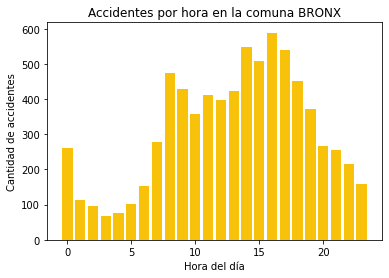

In [340]:
#Comuna the bronx
valores = df_comuna1[["Hora", "Accidente"]]
x = valores.Hora
y = valores.Accidente
plt.bar(x, y, label="Accidentes comuna",color = "#f8c20b")
plt.title("Accidentes por hora en la comuna BRONX")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de accidentes")
plt.show()

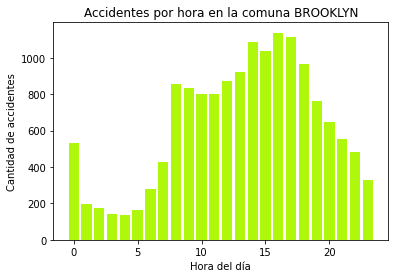

In [341]:
#Comuna BROOKLYN
valores = df_comuna2[["Hora", "Accidente"]]
x = valores.Hora
y = valores.Accidente
plt.bar(x, y, label="Accidentes comuna",color = "#b0f80b")
plt.title("Accidentes por hora en la comuna BROOKLYN")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de accidentes")
plt.show()

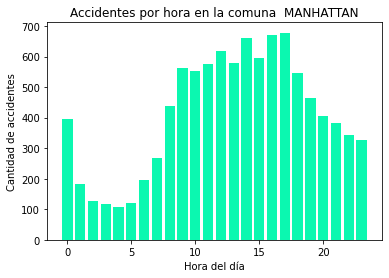

In [343]:
#Comuna  MANHATTAN
valores = df_comuna3[["Hora", "Accidente"]]
x = valores.Hora
y = valores.Accidente
plt.bar(x, y, label="Accidentes comuna",color = "#0bf8b0")
plt.title("Accidentes por hora en la comuna  MANHATTAN")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de accidentes")
plt.show()

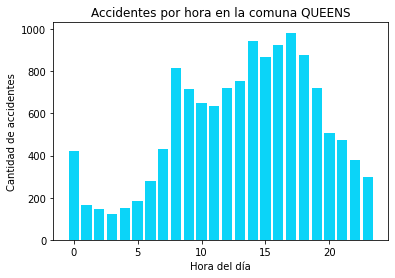

In [344]:
#Comuna QUEENS
valores = df_comuna4[["Hora", "Accidente"]]
x = valores.Hora
y = valores.Accidente
plt.bar(x, y, label="Accidentes comuna",color = "#0bd4f8")
plt.title("Accidentes por hora en la comuna QUEENS")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de accidentes")
plt.show()

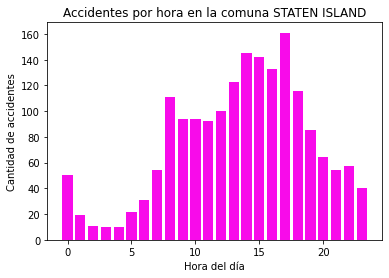

In [352]:
#Comuna STATEN ISLAND
valores = df_comuna5[["Hora", "Accidente"]]
x = valores.Hora
y = valores.Accidente
plt.bar(x, y, label="Accidentes comuna",color = "#f80bea")
plt.title("Accidentes por hora en la comuna STATEN ISLAND")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de accidentes")
plt.show()

## Parte 6: Causa de accidentes

¿Qué factores provocan la mayoría de los accidentes?

In [367]:
# Identificamos los datos
df_motivo = df.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).MONTH.count()
df_motivo.head()

CONTRIBUTING FACTOR VEHICLE 1
Accelerator Defective             28
Aggressive Driving/Road Rage     177
Alcohol Involvement              486
Animals Action                    37
Backing Unsafely                2782
Name: MONTH, dtype: int64

In [420]:
# Creamos el filtro para tener un numero unico para cada comuna
mask = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Accelerator Defective')
mask1 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Aggressive Driving/Road Rage')
mask2 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Alcohol Involvement')
mask3 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Animals Action')
mask4 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Backing Unsafely')
mask5 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Brakes Defective')
mask6 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hand-Held)')
mask7 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Driver Inattention/Distraction')
mask8 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Driver Inexperience')
mask9 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Driverless/Runaway Vehicle')
mask10 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Drugs (illegal)')
mask11 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Eating or Drinking')
mask12 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Failure to Keep Right')
mask13 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Failure to Yield Right-of-Way')
mask14 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Fatigued/Drowsy')
mask15 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Fell Asleep')
mask16 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Following Too Closely')
mask17 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Glare')
mask18 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Headlights Defective')
mask19 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Illnes')
mask20 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Lane Marking Improper/Inadequate')
mask21 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Lost Consciousness')
mask22 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Obstruction/Debris')
mask23 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Other Electronic Device')
mask24 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Other Lighting Defects')
mask25 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Other Vehicular')
mask26 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Outside Car Distraction')
mask27 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Oversized Vehicle')
mask28 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Passenger Distraction')
mask29 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Passing Too Closely')
mask30 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Passing or Lane Usage Improper')
mask31 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Pavement Defective')
mask32 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Pavement Slippery')
mask33 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion')
mask34 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Physical Disability')
mask35 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Prescription Medication')
mask36 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Reaction to Uninvolved Vehicle')
mask37 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Shoulders Defective/Improper')
mask38 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Steering Failure')
mask39 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Texting')
mask40 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Tinted Windows')
mask41 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Tire Failure/Inadequate')
mask42 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Tow Hitch Defective')
mask43 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Traffic Control Device Improper/Non-Working')
mask44 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Traffic Control Disregarded')
mask45 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Turning Improperly')
mask46 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Lane Changing')
mask47 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Speed')
mask48 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unspecified')
mask49 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Using On Board Navigation Device')
mask50 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Vehicle Vandalism')
mask51 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'View Obstructed/Limited')
mask52 = (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Windshield Inadequate')
mask53 = (df['CONTRIBUTING FACTOR VEHICLE 1'].isna())

In [425]:
# Colocamos el valor en el df principal
df_uno = df[mask]
df_uno = df_uno.index
df_uno
df.loc[df_uno, 'NMOTIVO'] = 1

df_dos = df[mask1]
df_dos = df_dos.index
df_dos
df.loc[df_dos, 'NMOTIVO'] = 2

df_tres = df[mask2]
df_tres = df_tres.index
df_tres
df.loc[df_tres, 'NMOTIVO'] = 3

df_cuatro = df[mask3]
df_cuatro = df_cuatro.index
df_cuatro
df.loc[df_cuatro, 'NMOTIVO'] = 4

df_quinto = df[mask4]
df_quinto = df_quinto.index
df_quinto
df.loc[df_quinto, 'NMOTIVO'] = 5

df_seis = df[mask5]
df_seis = df_seis.index
df_seis
df.loc[df_seis, 'NMOTIVO'] = 6

df_siete = df[mask6]
df_siete = df_siete.index
df_siete
df.loc[df_siete, 'NMOTIVO'] = 7

df_ocho = df[mask7]
df_ocho = df_ocho.index
df_ocho
df.loc[df_ocho, 'NMOTIVO'] = 8

df_nueve = df[mask8]
df_nueve = df_nueve.index
df_nueve
df.loc[df_nueve, 'NMOTIVO'] = 9

df_diez = df[mask9]
df_diez = df_diez.index
df_diez
df.loc[df_diez, 'NMOTIVO'] = 10

df_once = df[mask10]
df_once = df_once.index
df_once
df.loc[df_once, 'NMOTIVO'] = 11

df_doce = df[mask11]
df_doce = df_doce.index
df_doce
df.loc[df_doce, 'NMOTIVO'] = 12

df_trece = df[mask12]
df_trece = df_trece.index
df_trece
df.loc[df_trece, 'NMOTIVO'] = 13

df_catorce = df[mask13]
df_catorce = df_catorce.index
df_catorce
df.loc[df_catorce, 'NMOTIVO'] = 14

df_quince = df[mask14]
df_quince = df_quince.index
df_quince
df.loc[df_quince, 'NMOTIVO'] = 15

df_dieciseis = df[mask15]
df_dieciseis = df_dieciseis.index
df_dieciseis
df.loc[df_dieciseis, 'NMOTIVO'] = 16

df_diecisiete = df[mask16]
df_diecisiete = df_diecisiete.index
df_diecisiete
df.loc[df_diecisiete, 'NMOTIVO'] = 17

df_dieciocho = df[mask17]
df_dieciocho = df_dieciocho.index
df_dieciocho
df.loc[df_dieciocho, 'NMOTIVO'] = 18

df_diecinueve = df[mask18]
df_diecinueve = df_diecinueve.index
df_diecinueve
df.loc[df_diecinueve, 'NMOTIVO'] = 19

df_veinte = df[mask19]
df_veinte = df_veinte.index
df_veinte
df.loc[df_veinte, 'NMOTIVO'] = 20

df_veintiuno = df[mask20]
df_veintiuno = df_veintiuno.index
df_veintiuno
df.loc[df_veintiuno, 'NMOTIVO'] = 21

df_veintidos = df[mask21]
df_veintidos = df_veintidos.index
df_veintidos
df.loc[df_veintidos, 'NMOTIVO'] = 22

df_veintitres = df[mask22]
df_veintitres = df_veintitres.index
df_veintitres
df.loc[df_veintitres, 'NMOTIVO'] = 23

df_veinticuatro = df[mask23]
df_veinticuatro = df_veinticuatro.index
df_veinticuatro
df.loc[df_veinticuatro, 'NMOTIVO'] = 24

df_veinticinco = df[mask24]
df_veinticinco = df_veinticinco.index
df_veinticinco
df.loc[df_veinticinco, 'NMOTIVO'] = 25

df_veintiseis = df[mask25]
df_veintiseis = df_veintiseis.index
df_veintiseis
df.loc[df_veintiseis, 'NMOTIVO'] = 26

df_veintisiete = df[mask26]
df_veintisiete = df_veintisiete.index
df_veintisiete
df.loc[df_veintisiete, 'NMOTIVO'] = 27

df_veintiocho = df[mask27]
df_veintiocho = df_veintiocho.index
df_veintiocho
df.loc[df_veintiocho, 'NMOTIVO'] = 28

df_veintinueve = df[mask28]
df_veintinueve = df_veintinueve.index
df_veintinueve
df.loc[df_veintinueve, 'NMOTIVO'] = 29

df_treinta = df[mask29]
df_treinta = df_treinta.index
df_treinta
df.loc[df_treinta, 'NMOTIVO'] = 30

df_treintaiuno = df[mask30]
df_treintaiuno = df_treintaiuno.index
df_treintaiuno
df.loc[df_treintaiuno, 'NMOTIVO'] = 31

df_treintaidos = df[mask31]
df_treintaidos = df_treintaidos.index
df_treintaidos
df.loc[df_treintaidos, 'NMOTIVO'] = 32

df_treintaitres = df[mask32]
df_treintaitres = df_treintaitres.index
df_treintaitres
df.loc[df_treintaitres, 'NMOTIVO'] = 33

df_treintaicuatro = df[mask33]
df_treintaicuatro = df_treintaicuatro.index
df_treintaicuatro
df.loc[df_treintaicuatro, 'NMOTIVO'] = 34

df_treintaicinco = df[mask34]
df_treintaicinco = df_treintaicinco.index
df_treintaicinco
df.loc[df_treintaicinco, 'NMOTIVO'] = 35

df_treintaiseis = df[mask35]
df_treintaiseis = df_treintaiseis.index
df_treintaiseis
df.loc[df_treintaiseis, 'NMOTIVO'] = 36

df_treintaisiete = df[mask36]
df_treintaisiete = df_treintaisiete.index
df_treintaisiete
df.loc[df_treintaisiete, 'NMOTIVO'] = 37

df_treintaiocho = df[mask37]
df_treintaiocho = df_treintaiocho.index
df_treintaiocho
df.loc[df_treintaiocho, 'NMOTIVO'] = 38

df_treintainueve = df[mask38]
df_treintainueve = df_treintainueve.index
df_treintainueve
df.loc[df_treintainueve, 'NMOTIVO'] = 39

df_cuarenta = df[mask39]
df_cuarenta = df_cuarenta.index
df_cuarenta
df.loc[df_cuarenta, 'NMOTIVO'] = 40

df_cuarentaiuno = df[mask40]
df_cuarentaiuno = df_cuarentaiuno.index
df_cuarentaiuno
df.loc[df_cuarentaiuno, 'NMOTIVO'] = 41

df_cuarentados = df[mask41]
df_cuarentados = df_cuarentados.index
df_cuarentados
df.loc[df_cuarentados, 'NMOTIVO'] = 42

df_cuarentatres = df[mask42]
df_cuarentatres = df_cuarentatres.index
df_cuarentatres
df.loc[df_cuarentatres, 'NMOTIVO'] = 43

df_cuarentacuatro = df[mask43]
df_cuarentacuatro = df_cuarentacuatro.index
df_cuarentacuatro
df.loc[df_cuarentacuatro, 'NMOTIVO'] = 44

df_cuarentacinco = df[mask44]
df_cuarentacinco = df_cuarentacinco.index
df_cuarentacinco
df.loc[df_cuarentacinco, 'NMOTIVO'] = 45

df_cuarentaseis = df[mask45]
df_cuarentaseis = df_cuarentaseis.index
df_cuarentaseis
df.loc[df_cuarentaseis, 'NMOTIVO'] = 46

df_cuarentasiete = df[mask46]
df_cuarentasiete = df_cuarentasiete.index
df_cuarentasiete
df.loc[df_cuarentasiete, 'NMOTIVO'] = 47

df_cuarentaocho = df[mask47]
df_cuarentaocho = df_cuarentaocho.index
df_cuarentaocho
df.loc[df_cuarentaocho, 'NMOTIVO'] = 48

df_cuarentanueve = df[mask48]
df_cuarentanueve = df_cuarentanueve.index
df_cuarentanueve
df.loc[df_cuarentanueve, 'NMOTIVO'] = 49

df_cincuenta = df[mask49]
df_cincuenta = df_cincuenta.index
df_cincuenta
df.loc[df_cincuenta, 'NMOTIVO'] = 50

df_cincuentauno = df[mask50]
df_cincuentauno = df_cincuentauno.index
df_cincuentauno
df.loc[df_cincuentauno, 'NMOTIVO'] = 51

df_cincuentados = df[mask51]
df_cincuentados = df_cincuentados.index
df_cincuentados
df.loc[df_cincuentados, 'NMOTIVO'] = 52

df_cincuentatres = df[mask52]
df_cincuentatres = df_cincuentatres.index
df_cincuentatres
df.loc[df_cincuentatres, 'NMOTIVO'] = 53

df_cincuentacuatro = df[mask53]
df_cincuentacuatro = df_cincuentacuatro.index
df_cincuentacuatro
df.loc[df_cincuentacuatro, 'NMOTIVO'] = 54
df_veinticuatro

Int64Index([1909, 2854, 4562, 41766], dtype='int64')

In [422]:
# Agrupamos los datos por el numero de comuna y la cantidad de accidentes
df7 = df.groupby(["NMOTIVO", "CONTRIBUTING FACTOR VEHICLE 1"]).MONTH.count()
df7.head()

NMOTIVO  CONTRIBUTING FACTOR VEHICLE 1
1.0      Accelerator Defective              28
2.0      Aggressive Driving/Road Rage      177
3.0      Alcohol Involvement               486
4.0      Animals Action                     37
5.0      Backing Unsafely                 2782
Name: MONTH, dtype: int64

In [417]:
#Pasamos los datos a una lista
lista7 = [list(key) + [str(value)] for key, value in  df7.to_dict().items()]

In [423]:
#Creamos el nuevo dataframe
df_motivo = pd.DataFrame()
#Agregamos los datos de solo el dia 1 del mes 1 y del año 2018 al nuevo dataFrame creado
for x in lista7:
  agregar = {}
  agregar = {"Motivo" : x[0], "Accidente": int(x[2])}
  df_motivo = df_motivo.append(agregar, ignore_index=True)
df_motivo.head(55)

,Accidente,Motivo
0,28.0,1.0
1,177.0,2.0
2,486.0,3.0
3,37.0,4.0
4,2782.0,5.0
5,164.0,6.0
6,12.0,7.0
7,11810.0,8.0
8,714.0,9.0
9,47.0,10.0


ValueError: ignored

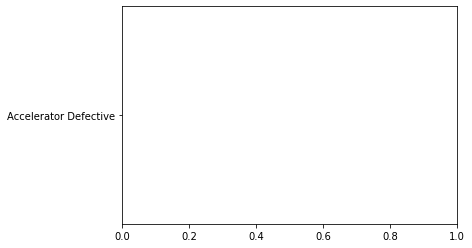

In [402]:
#Realizamos el grafico con los datos obtenidos
valores = df_motivo[["Motivo", "Accidente"]]
p = valores.Motivo
x = ['Accelerator Defective', 'Aggressive Driving/Road Rage', 'Alcohol Involvement', 'Animals Action', 'Backing Unsafely', 
     'Brakes Defective', 'Cell Phone (hand-Held)', 'Driver Inattention/Distraction', 'Driver Inexperience', 'Driverless/Runaway Vehicle', 
     'Drugs (illegal)', 'Eating or Drinking', 'Failure to Keep Right', 'Failure to Yield Right-of-Way', 'Fatigued/Drowsy', 
     'Fell Asleep', 'Following Too Closely', 'Glare', 'Headlights Defective', 'Illnes', 
     'Lane Marking Improper/Inadequate', 'Lost Consciousness', 'Obstruction/Debris', 'Other Electronic Device', 'Other Lighting Defects', 
     'Other Vehicular', 'Outside Car Distraction', 'Oversized Vehicle', 'Passenger Distraction', 'Passing Too Closely', 
     'Passing or Lane Usage Improper', 'Pavement Defective', 'Pavement Slippery', 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Physical Disability', 
     'Prescription Medication', 'Reaction to Uninvolved Vehicle', 'Shoulders Defective/Improper', 'Steering Failure', 'Texting', 'Tinted Windows',
     'Tire Failure/Inadequate', 'Tow Hitch Defective', 'Traffic Control Device Improper/Non-Working', 'Traffic Control Disregarded', 'Turning Improperly',
     'Unsafe Lane Changing', 'Unsafe Speed', 'Unspecified', 'Using On Board Navigation Device', 'Vehicle Vandalism', 
     'View Obstructed/Limited', 'Windshield Inadequate', 'No se sabe']
y = valores.Accidente
plt.barh(x, y, label="Accidentes comuna",color = "#f80b70")
plt.title("Accidentes por comuna y por km cuadrado")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de accidentes")
plt.show()